In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

### Inspect Tables
To know what the tables have in each column and what type of data they are we will use the inspection tool

In [10]:
inspector = inspect(engine)

In [11]:
#inspect measurement table
columns = inspector.get_columns('measurement')
for c in columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
#view what the info looks like in the measurement table
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [13]:
#inspect station table
columns = inspector.get_columns('station')
for c in columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


Measurement table shows us the precipitation, when/ what station recorded it.
Station table shows us the location of the station as well as the elevation.
When making a merge or a join it'll be best use the id as the merge point.

In [14]:
#view what the info looks like in the stations table
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Climate Analysis

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [16]:
# Calculate the date 1 year ago from the last data point in the database
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print(year_ago)

2016-08-23


In [17]:
# Perform a query to retrieve the date and precipitation scores
scores = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= '2016-08-23', measurement.date <= '2017-08-23').\
    order_by(measurement.date).all()
scores

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [18]:
# Save the query results as a Pandas DataFrame and set the index to the date column
yearly_prcp = pd.DataFrame(data=scores)
yearly_prcp.head(10)

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
5,2016-08-23,1.79
6,2016-08-23,0.70
7,2016-08-24,0.08
8,2016-08-24,2.15
9,2016-08-24,2.28


In [19]:
# Sort the dataframe by date
yearly_prcp = yearly_prcp.set_index("date")
yearly_prcp.head(10)

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15


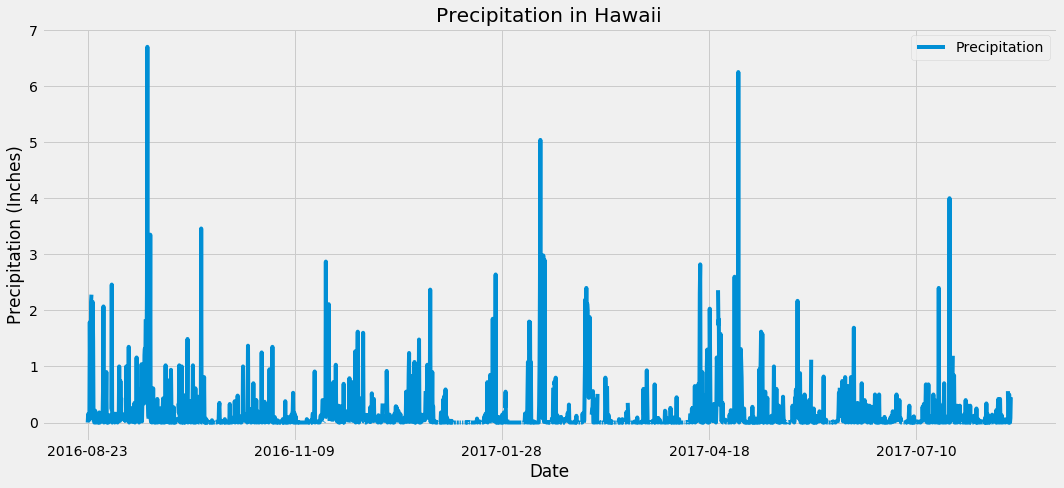

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
yearly_prcp.plot(figsize=(15,7))
plt.title("Precipitation in Hawaii")
plt.xlabel("Date")
plt.ylabel("Precipitation (Inches)")
plt.legend(["Precipitation"], loc="upper right")
plt.tight_layout()
plt.show()

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
yearly_rename = yearly_prcp.rename(columns={"prcp": "precipitation"})
yearly_rename.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [22]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(station.id).count()
stations

9

In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# Use Measurement query since it has simplier rows
most_active = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
MAS = 'USC00519281'
#tempature will print out as follows: min, max, avg
tempatures = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == MAS).all()
tempatures

[(54.0, 85.0, 71.66378066378067)]

In [25]:
# Count function to see what station has the most temp observations
temp_count = (session.query(measurement.station, func.count(measurement.tobs))
                        .group_by(measurement.tobs)
                        .order_by(func.count(measurement.tobs).desc())
                        .all())
temp_count

[('USC00519397', 1752),
 ('USC00519397', 1654),
 ('USC00519397', 1625),
 ('USC00519397', 1606),
 ('USC00519397', 1601),
 ('USC00519397', 1425),
 ('USC00519397', 1375),
 ('USC00519397', 1257),
 ('USC00519397', 1159),
 ('USC00519397', 1103),
 ('USC00519397', 785),
 ('USC00519397', 739),
 ('USC00519397', 614),
 ('USC00519397', 603),
 ('USC00519397', 440),
 ('USC00519397', 381),
 ('USC00519397', 355),
 ('USC00519397', 240),
 ('USC00519397', 186),
 ('USC00519397', 169),
 ('USC00519397', 135),
 ('USC00519397', 81),
 ('USC00519397', 77),
 ('USC00519397', 49),
 ('USC00519397', 36),
 ('USC00519397', 31),
 ('USC00519397', 20),
 ('USC00519523', 18),
 ('USC00519397', 12),
 ('USC00519397', 11),
 ('USC00519397', 4),
 ('USC00511918', 4),
 ('USC00511918', 1),
 ('USC00519281', 1),
 ('USC00511918', 1)]

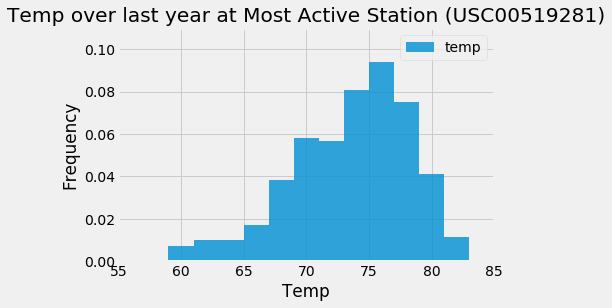

In [105]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# highest_temp_count = 'USC00519397'
temp_obs = session.query(measurement.station, measurement.tobs).filter(measurement.station == MAS).\
    filter(func.strftime('%Y-%m-%d', measurement.date) >= dt.date(2016, 8, 23)).all()

#save to a dataframe
highest_temp_df = pd.DataFrame(temp_obs, columns = ['date', 'temp'])

highest_temp_df.plot(kind='hist', bins=12, align='mid', label="tobs", alpha=.8, density=1)

#labels
plt.title("Temp over last year at Most Active Station (USC00519281)")
plt.xlabel("Temp")
plt.ylabel("Frequency")
plt.axis([55, 85, 0, 0.11])
plt.savefig("Temp_at_Most_Active_Station_(USC00519281).png")


## Bonus Challenge Assignment

In [26]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [27]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
tripStart = '2017-03-04'
tripEnd = '2017-03-18'
trip_calc_temp = calc_temps(tripStart, tripEnd)
trip_calc_temp

[(62.0, 70.92307692307692, 82.0)]

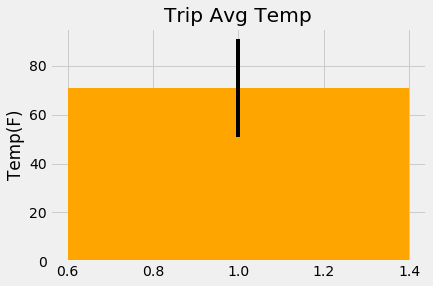

In [28]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

#bar chart: (1, avg_temp, yerr=(tmax-tmin), ...ect)
peak = (82-62)
plt.bar(1, height=70.92, yerr=20, align='center', color='orange')

#labels
plt.title("Trip Avg Temp")
plt.ylabel("Temp(F)")
plt.show()

In [60]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

tripStart = '2017-03-04'
tripEnd = '2017-03-18'

active_st = most_active
active_st

stations_l = []
for t in active_st:
    stations_l.append(t)
    
t = session.query(station.station, station.name, station.latitude, station.longitude, station.elevation, func.sum(measurement.prcp)).\
                filter(measurement.station == station.station).\
                filter(measurement.date >= tripStart).\
                filter(measurement.date <= tripEnd).\
                group_by(measurement.station).\
                order_by(func.sum(measurement.prcp).desc()).all()

#put into a dataframe for readability
stations_df = pd.DataFrame(t, columns= ['Station', 'Name', 'Lat', 'Long', 'Elevation', 'Preciptation total (inches)'])
stations_df

,Station,Name,Lat,Long,Elevation,Preciptation total (inches)
0,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,1.76
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,1.31
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.69
3,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.36
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.35
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.35
6,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.06


In [75]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

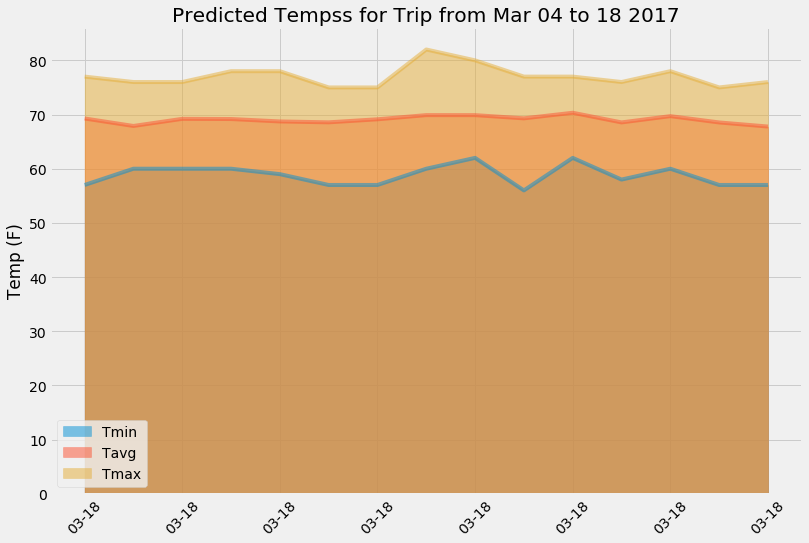

In [106]:
#create a function called daily_normals that will calculate the daily normals for a specific date
def daily_normals(d):
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == d).all()
    
#list for date ranges. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html for documantation
dates = pd.date_range(tripStart, tripEnd)

#format time to be %m-%d
format_dates = dates.strftime('%m-%d')

#find daily norms and append to a list
norms = []
for dates in format_dates:
    norms.append(*daily_normals(dates))
    

# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
norms_df = pd.DataFrame(norms, columns = ['Tmin', 'Tavg', 'Tmax'])

#set dates to the index
norms_df['Date'] = dates
norms_df = norms_df.set_index('Date')

# Plot the daily normals as an area plot with `stacked=False`
norms_df.plot(kind='area', figsize=(12, 8), stacked=False, x_compat=True, title='Predicted Tempss for Trip from Mar 04 to 18 2017', rot=45)

#lables
plt.xlabel('')
plt.ylabel('Temp (F)')

plt.show()

Text(0.5, 0, '')

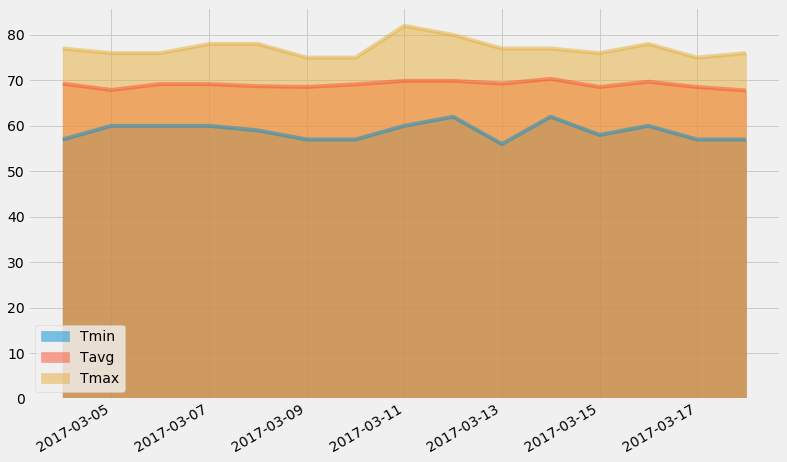

In [108]:
#create a function called daily_normals that will calculate the daily normals for a specific date
def daily_normals(day_date):
    temps = session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
                          filter(func.strftime("%m-%d", measurement.date) == day_date).all()
    return temps
    
#create a list of dates for your trip 
trip_dates = pd.date_range(tripStart, tripEnd)

#format it to %m-%d
trip_mmdd = trip_dates.strftime('%m-%d')

#calculate the normals for each date string and append the results to a list
normals_list = []
for trip_date in trip_mmdd:
    #unpack daily_normals
    normals_list.append(*daily_normals(trip_date))

#make a df
normals_df = pd.DataFrame(normals_list, columns = ['Tmin', 'Tavg', 'Tmax'])

#make the trip dates the index
normals_df['Date'] = trip_dates
normals_df = normals_df.set_index('Date')

'''Area Plot'''

#make a colors list
colors = ['mediumslateblue', 'hotpink', 'palegreen']

#make an area plot for the predicted temps
normals_df.plot(kind='area', figsize=(12, 8), stacked=False, x_compat=True)

#make the labels
plt.xlabel('')
#plt.ylabel('Temp (F)')

#plt.show()